In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings

# Suppress UserWarning for figure layout changes
warnings.filterwarnings("ignore")


%matplotlib inline

In [2]:
df = pd.read_csv("/media/magesh/c9e890ad-c69f-4596-9b0f-c1eee81a1764/Magesh/Projects/ML/Data/USvideos.csv")

In [3]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [5]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [38]:
class TitleAnalyzer:
    def __init__(self, df):
        self.df = df
        
    def title_length(self):
        self.df['Title_length'] = self.df['title'].apply(lambda x: len(x))
        
        plt.figure(figsize=(6, 6))
        sns.displot(self.df['Title_length'])
        plt.title("Length of the Title")
        plt.ylabel("Number of Videos")
        plt.show()
    
    def contains_capitalized_word(self, s):
        for i in s.split():
            if i.isupper():
                return True
        return False
    
    def analyze_and_plot(self):
        self.df['contains_capitalized'] = self.df['title'].apply(self.contains_capitalized_word)
        
        plt.figure(figsize=(6, 6))  
        sns.countplot(data=self.df, x='contains_capitalized')
        plt.title("Title Contains Capitalized Words")
        plt.show()
    
    
    def comparing_views_and_title_length(self):
        plt.figure(figsize=(6, 6))
        sns.scatterplot(data=self.df, x='views', y='Title_length')
        plt.title("Comparing Views and Title Length")
        plt.show()
    
        
    def finding_correlation(self):
        h_labels = [x.replace('_', ' ').title() for x in 
            list(self.df.select_dtypes(include=['number', 'bool']).columns.values)]
        
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.heatmap(self.df.corr(numeric_only=True), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)
           
    def word_cloud(self):
        text = str(df['title'])
        wordcloud = WordCloud().generate(text)
        
        plt.imshow(wordcloud,interpolation='bilinear')
        plt.axis('off')
        plt.show()
        
titlelengthanalyzer = TitleAnalyzer(df)


<Figure size 600x600 with 0 Axes>

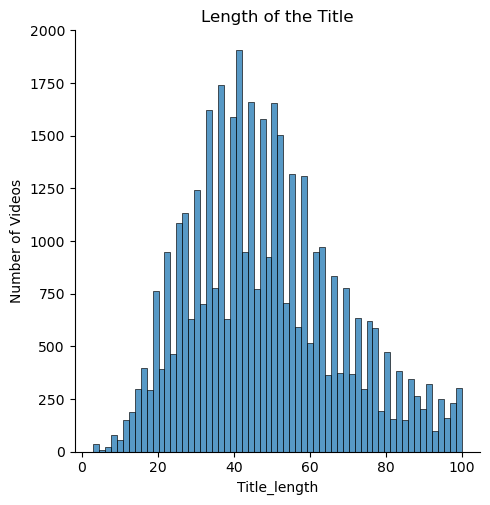

In [39]:
titlelengthanalyzer.title_length()

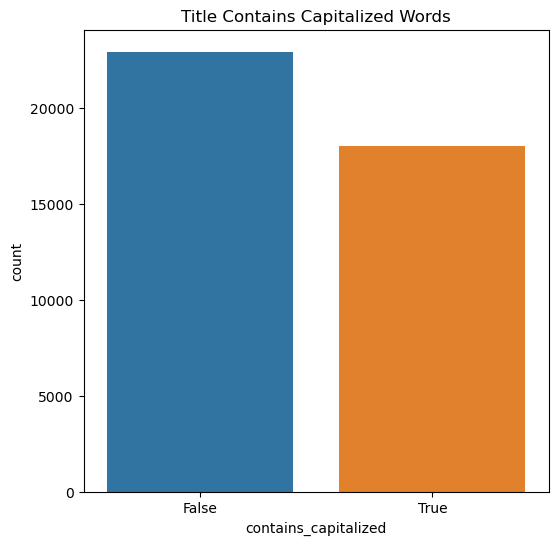

In [40]:
titlelengthanalyzer.analyze_and_plot()

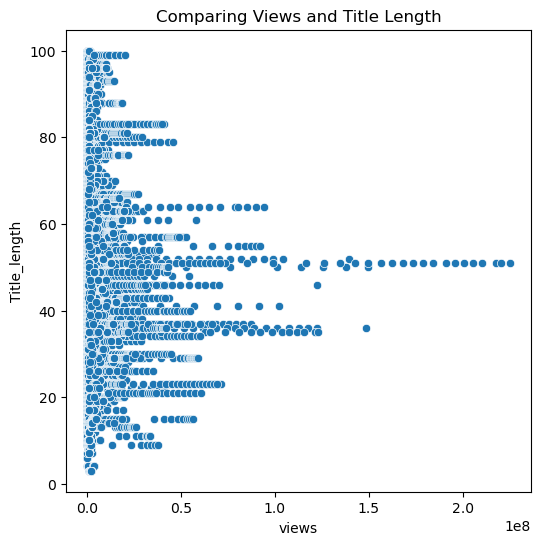

In [41]:
titlelengthanalyzer.comparing_views_and_title_length()

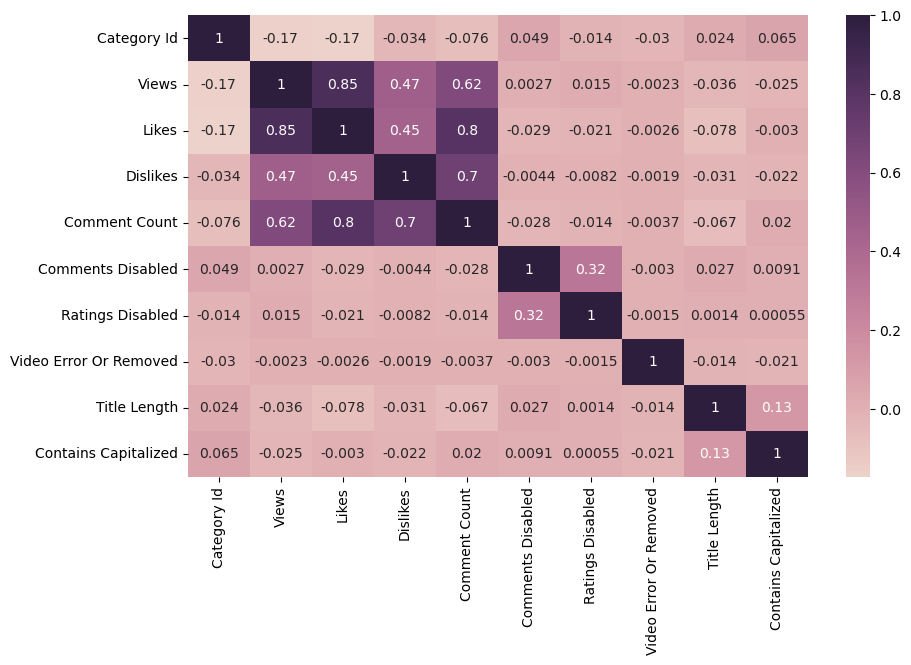

In [42]:
titlelengthanalyzer.finding_correlation()

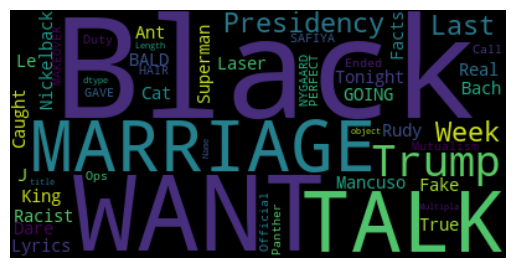

In [43]:
titlelengthanalyzer.word_cloud()